
# Liberty Rider - Swift Meetup  : "CoreML : comment réconcilier développeur iOS et data scientist ?"

- date: 15/02/18
- auteur: Jérémie Fourmann (CSO @ Liberty Rider) & Mathieu Vandeginste (Dev IOS @ Liberty Rider)
- email: jeremie.fourmann@liberty-rider.com & mathieu.vandeginste@liberty-rider.com
- objectif: 
    - construire un modèle de classification d'images de chiens et chats en utilisant un réseau de neurones convolutionnels
    - exporter le modèle pour CoreML



## --- Setup du projet ---

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import coremltools

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/val'
test_data_dir = 'data/test/'
nb_train_samples = 2000
nb_validation_samples = 400
epochs = 50
batch_size = 32

## --- Définition de l'architecture du réseau de neurones ---

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## --- Augmentation des données ---

In [5]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


## --- Phase d'entrainement ---

In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
62/62 [==============================] - 82s - loss: 0.8130 - acc: 0.5131 - val_loss: 0.6891 - val_acc: 0.4948
Epoch 2/50
62/62 [==============================] - 85s - loss: 0.6910 - acc: 0.5711 - val_loss: 0.6477 - val_acc: 0.5871
Epoch 3/50
62/62 [==============================] - 90s - loss: 0.6677 - acc: 0.6129 - val_loss: 0.6121 - val_acc: 0.6719
Epoch 4/50
62/62 [==============================] - 92s - loss: 0.6330 - acc: 0.6321 - val_loss: 0.5794 - val_acc: 0.6953
Epoch 5/50
62/62 [==============================] - 92s - loss: 0.6174 - acc: 0.6618 - val_loss: 0.6546 - val_acc: 0.6354
Epoch 6/50
62/62 [==============================] - 90s - loss: 0.5972 - acc: 0.6794 - val_loss: 0.5515 - val_acc: 0.7135
Epoch 7/50
62/62 [==============================] - 95s - loss: 0.5767 - acc: 0.6971 - val_loss: 0.5663 - val_acc: 0.7005
Epoch 8/50
62/62 [==============================] - 92s - loss: 0.5824 - acc: 0.6885 - val_loss: 0.5539 - val_acc: 0.7083
Epoch 9/50
62/62 [======

## --- Evaluation des performances ---

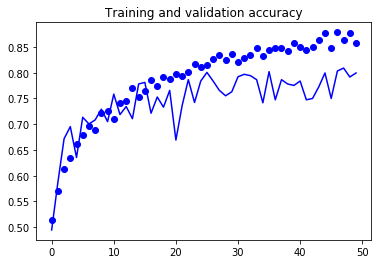

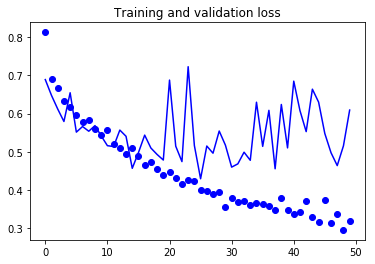

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [8]:
print model.input
print train_generator.class_indices

Tensor("conv2d_1_input:0", shape=(?, 150, 150, 3), dtype=float32)
{'dog': 1, 'cat': 0}


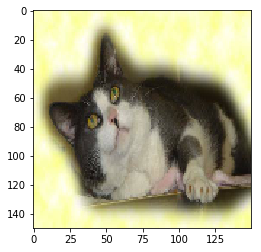

prediction:[[0]]
proba: [[ 0.00014423]]


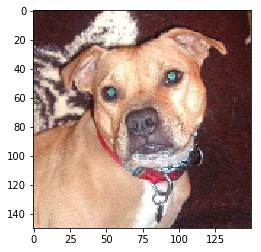

prediction:[[1]]
proba: [[ 0.99762696]]


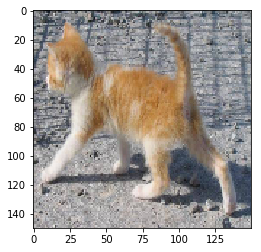

prediction:[[0]]
proba: [[ 0.2000154]]


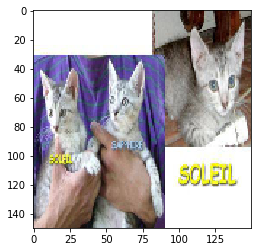

prediction:[[1]]
proba: [[ 0.96890455]]


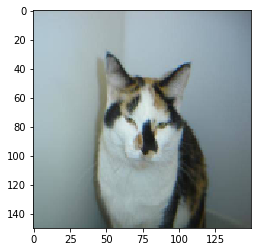

prediction:[[1]]
proba: [[ 0.83542478]]


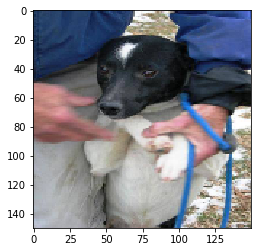

prediction:[[1]]
proba: [[ 0.99138099]]


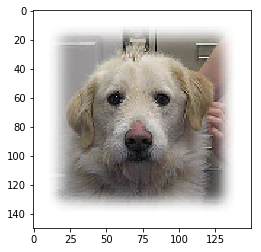

prediction:[[0]]
proba: [[ 0.32260683]]


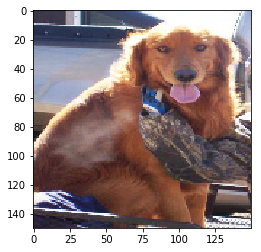

prediction:[[0]]
proba: [[ 0.05249392]]


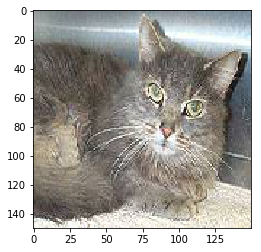

prediction:[[0]]
proba: [[ 0.00133563]]


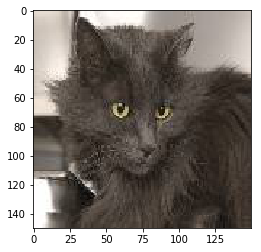

prediction:[[0]]
proba: [[ 0.00020095]]


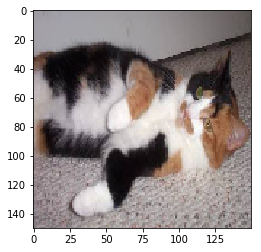

prediction:[[0]]
proba: [[ 0.02359342]]


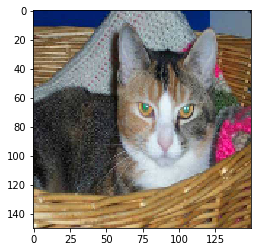

prediction:[[0]]
proba: [[ 0.00089363]]


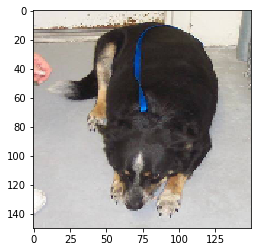

prediction:[[1]]
proba: [[ 0.99926323]]


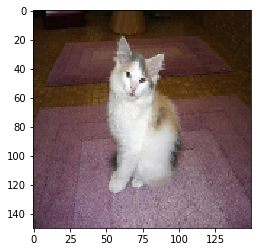

prediction:[[0]]
proba: [[ 0.09605182]]


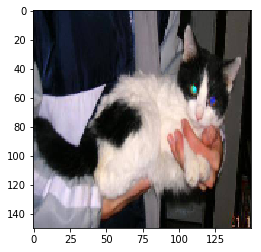

prediction:[[0]]
proba: [[ 0.04922666]]


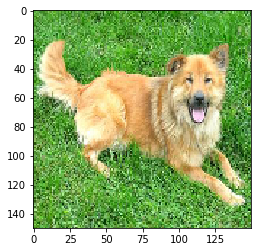

prediction:[[1]]
proba: [[ 0.97221553]]


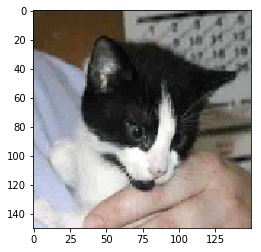

prediction:[[0]]
proba: [[ 0.1473159]]


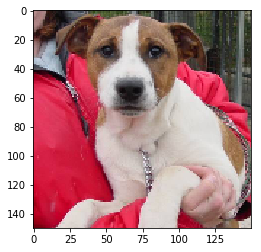

prediction:[[0]]
proba: [[ 0.00058183]]


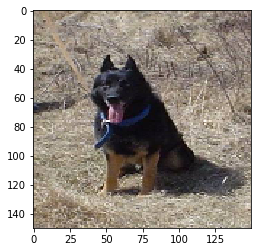

prediction:[[1]]
proba: [[ 0.65761346]]


In [9]:
import os
names = os.listdir(test_data_dir)

for image in names[1:20]:
    img = load_img(test_data_dir+image)  # this is a PIL image
    img = img.resize((150,150))
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x=x/255
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    print('prediction:%s'%model.predict_classes(x,verbose=False))
    print('proba: %s'%model.predict_proba(x,verbose=False))


In [10]:
model.save('model')

## ---- Export du model pour CoreML --- 

In [13]:
model = load_model('model')

In [15]:
# https://apple.github.io/coremltools/generated/coremltools.converters.keras.convert.html
coreml_model=coremltools.converters.keras.convert(model, input_names=['image'],output_names=['species'], image_input_names = 'image',image_scale=1./255, predicted_probabilities_output='activation_5')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x7f81100723d0>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x7f8110072650>
2 : activation_1, <keras.layers.core.Activation object at 0x7f8110072490>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7f8110072f90>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x7f8110072510>
5 : activation_2, <keras.layers.core.Activation object at 0x7f8110139d10>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x7f8110139410>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x7f8110106f90>
8 : activation_3, <keras.layers.core.Activation object at 0x7f81100b7c10>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x7f81100b7f50>
10 : flatten_1, <keras.layers.core.Flatten object at 0x7f8110087f90>
11 : dense_1, <keras.layers.core.Dense object at 0x7f8110087f10>
12 : activation_4, <keras.layers.core.Activation object at 0x7f8110094d50>
13 : dense_2, <ker

In [17]:
coreml_model.author = 'Jeremie & Mathieu'
coreml_model.license = ' MIT License'
coreml_model.short_description = "CatsNDogs v1.1"
coreml_model.input_description['image'] = '150*150*3 rgb image'
coreml_model.output_description['species'] = '0: cat & 1:dog'

In [18]:
coreml_model.save("model.mlmodel")

In [19]:
coreml_model

input {
  name: "image"
  shortDescription: "150*150*3 rgb image"
  type {
    imageType {
      width: 150
      height: 150
      colorSpace: RGB
    }
  }
}
output {
  name: "species"
  shortDescription: "0: cat & 1:dog"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}
metadata {
  shortDescription: "CatsNDogs v1.1"
  author: "Jeremie & Mathieu"
  license: " MIT License"
}